# Kernel Density Estimation

`Gaussian Density Estimation`  
`iris dataset`

---


In this notebook, we estimate the densities of the different populations in the iris dataset.

## Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

## Data

In [2]:
col_names = ["sepal_length","sepal_width","petal_length","petal_width","species"]
data = pd.read_csv('iris.csv', names=col_names)
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- The dataset contains four features: sepal length, sepal width, petal length, and petal width.
- The three populations are: Iris-setosa, Iris-versicolor, and Iris-virginica.

- Let's check the properties of the features and the target variable:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Let's encode the target variable numerically:

In [4]:
data["encoded_species"] = data["species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Now, let's plot the features we are going to use to estimate the densities:

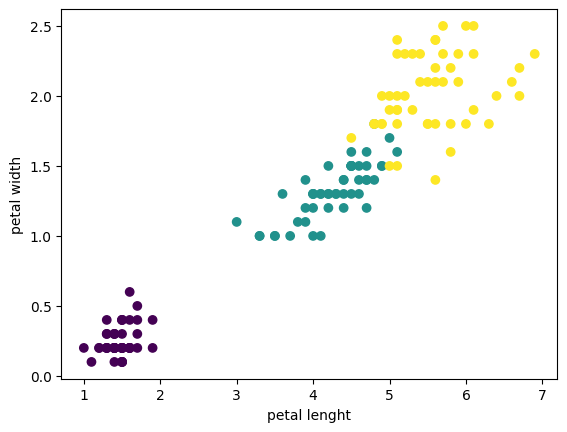

In [9]:
plt.scatter("petal_length", "petal_width", c="encoded_species", data=data)
plt.xlabel("petal lenght")
plt.ylabel("petal width")
plt.show()

- It seems that the two features, petal length and petal width are good at separating the three populations.

## Density estimation

- Now, let's estimate the densities of the three populations using the two features:

In [6]:
# extract the two features for each population
setosa = np.array(data[data["species"]=="Iris-setosa"][["petal_length","petal_width"]])
versicolor = np.array(data[data["species"]=="Iris-versicolor"][["petal_length","petal_width"]])
virginica = np.array(data[data["species"]=="Iris-virginica"][["petal_length","petal_width"]])

# estimate the densities of the three populations using
# gaussian kernel with predefined bandwidth
setosa_kd = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(setosa)
versicolor_kd = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(versicolor)
virginica_kd = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(virginica)

## Plot the estimated functions

- To plot the estimated functions, we need to score them along their ranges (i.e., the possible values of the feautres):

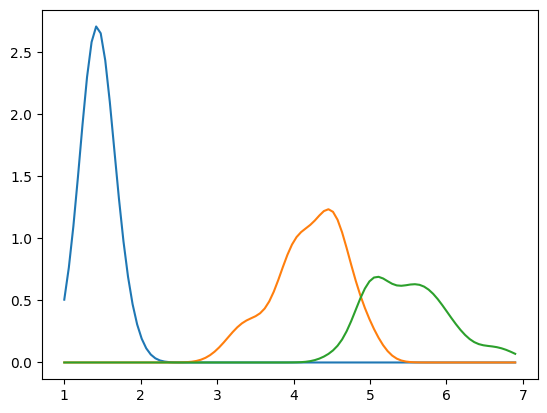

In [8]:
# find the min and max values for each feature
x1_min = data["petal_length"].min()
x1_max = data["petal_length"].max()
x2_min = data["petal_width"].min()
x2_max = data["petal_width"].max()

# the first feature is the first axis and
# the second feature is the second axis
x_axis = np.linspace(x1_min, x1_max, 100)
y_axis = np.linspace(x2_min, x2_max, 100)

# score the estimated functions along the axises
setosa_results = setosa_kd.score_samples(np.array(list(zip(x_axis,y_axis))))
versicolor_results = versicolor_kd.score_samples(np.array(list(zip(x_axis,y_axis))))
virginica_results = virginica_kd.score_samples(np.array(list(zip(x_axis,y_axis))))

# plot the scores in 2D figure
plt.plot(x_axis, np.exp(setosa_results))
plt.plot(x_axis, np.exp(versicolor_results))
plt.plot(x_axis, np.exp(virginica_results))
plt.show()

- To plot the estimated functions on a 3D figure, we need to score them along their ranges (i.e., combinations of feature values in this case):

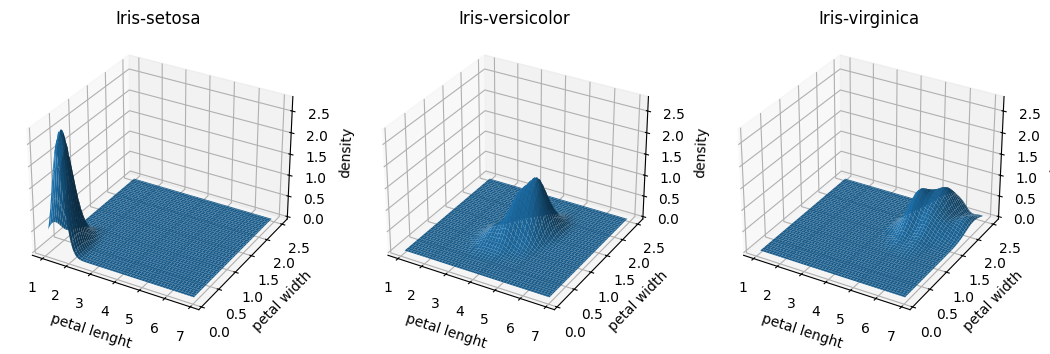

In [16]:
# cominations of feature values (grid):
#  repeat the rows in x_axis len(y_axis) time and \
#  repeat the columns in y_axis len(x_axis) time
x_grid, y_grid = np.meshgrid(x_axis, y_axis)

# stack the axises after flattening them
xy_grid = np.c_[np.ravel(x_grid),np.ravel(y_grid)]

# score the the three estimated functions along the axises
setosa_results = setosa_kd.score_samples(xy_grid)
versicolor_results = versicolor_kd.score_samples(xy_grid)
virginica_results = virginica_kd.score_samples(xy_grid)

fig = plt.figure(figsize=(13, 30))

ax1 = fig.add_subplot(1, 3, 3, projection='3d')
ax1.plot_surface(x_grid, y_grid, np.exp(virginica_results.reshape(x_grid.shape)))
ax1.set_xlabel("petal lenght")
ax1.set_ylabel("petal width")
ax1.set_zlabel("density")
ax1.set_title("Iris-virginica")

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharez=ax1)
ax2.plot_surface(x_grid, y_grid, np.exp(versicolor_results.reshape(x_grid.shape)))
ax2.set_xlabel("petal lenght")
ax2.set_ylabel("petal width")
ax2.set_zlabel("density")
ax2.set_title("Iris-versicolor")

ax3 = fig.add_subplot(1, 3, 1, projection='3d', sharez=ax1)
ax3.plot_surface(x_grid, y_grid, np.exp(setosa_results.reshape(x_grid.shape)))
ax3.set_xlabel("petal lenght")
ax3.set_ylabel("petal width")
ax3.set_zlabel("density")
ax3.set_title("Iris-setosa")
plt.show()

- Or equivalently:

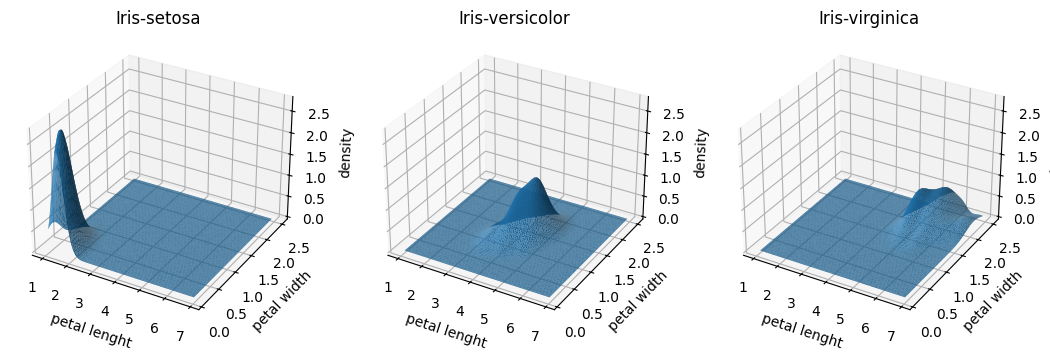

In [18]:
fig = plt.figure(figsize=(13, 30))

ax1 = fig.add_subplot(1, 3, 3, projection='3d')
ax1.plot_trisurf(xy_grid[:,0], xy_grid[:,1], np.exp(virginica_results))
ax1.set_xlabel("petal lenght")
ax1.set_ylabel("petal width")
ax1.set_zlabel("density")
ax1.set_title("Iris-virginica")

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_trisurf(xy_grid[:,0], xy_grid[:,1], np.exp(versicolor_results))
ax2.sharez(ax1)
ax2.set_xlabel("petal lenght")
ax2.set_ylabel("petal width")
ax2.set_zlabel("density")
ax2.set_title("Iris-versicolor")

ax3 = fig.add_subplot(1, 3, 1, projection='3d', sharez=ax1)
ax3.plot_trisurf(xy_grid[:,0], xy_grid[:,1], np.exp(setosa_results))
ax3.set_xlabel("petal lenght")
ax3.set_ylabel("petal width")
ax3.set_zlabel("density")
ax3.set_title("Iris-setosa")
plt.show()

- Plot the estimated functions in the same 3D figure:

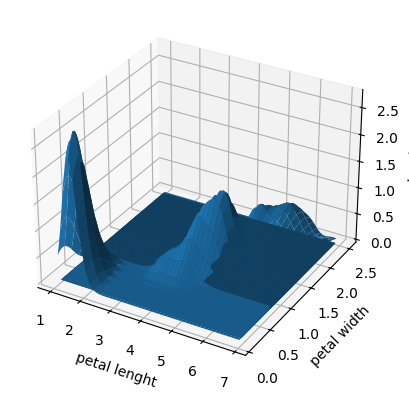

In [20]:
XXX = np.vstack((x_grid,x_grid,x_grid))
YYY = np.vstack((y_grid,y_grid,y_grid))
kd_results = np.vstack((setosa_results,versicolor_results,virginica_results)).reshape(-1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(XXX, YYY, np.exp(kd_results.reshape(XXX.shape)))
ax.set_xlabel("petal lenght")
ax.set_ylabel("petal width")
ax.set_zlabel("density")
plt.show()

- Or equivalently:

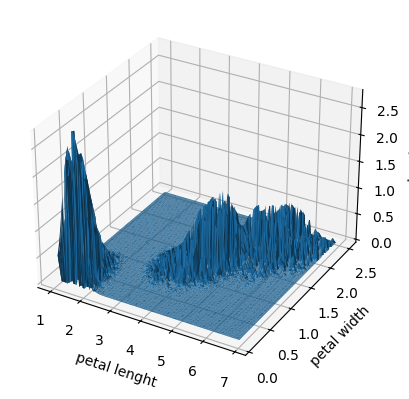

In [21]:
XXX = np.stack((x_grid,x_grid,x_grid)).ravel()
YYY = np.stack((y_grid,y_grid,y_grid)).ravel()
kd_results = np.stack((setosa_results,versicolor_results,virginica_results)).ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(XXX, YYY, np.exp(kd_results))
ax.set_xlabel("petal lenght")
ax.set_ylabel("petal width")
ax.set_zlabel("density")
plt.show()